In [1]:
from utils.binaries import *
from utils.plotting import *

from utils.auger.sd.sim import SimData
from utils.CONSTANTS import *

22:36:33 (   +6.0s) [INFO   ] -- import logging
22:36:33 (  +232ms) [INFO   ] -- import numpy as np
22:36:33 (   +12ms) [INFO   ] -- import uncertainties
22:36:34 (  +612ms) [INFO   ] -- import pandas as pd
22:36:34 (    +2ms) [WARNING] -- pandas support to be dropped at some point!
22:36:34 (    +2ms) [INFO   ] -- import binaries.tools as tools
22:36:35 (  +642ms) [INFO   ] -- import matplotlib.pyplot as plt
22:36:35 (  +801ms) [INFO   ] -- import seaborn as so
22:36:35 (    +4ms) [INFO   ] -- set MONI_PATH = PosixPath('/cr/work/filip/monit_and_sd')
22:36:35 (    +2ms) [INFO   ] -- set HIST_PATH = PosixPath('/cr/work/filip/monit_and_sd')
22:36:35 (    +0ms) [INFO   ] -- set PLOT_PATH = PosixPath('/cr/data01/filip/plots')
22:36:35 (    +1ms) [INFO   ] -- set DATA_PATH = PosixPath('/cr/data01/filip/Data')
22:36:35 (    +1ms) [INFO   ] -- set SCAN_PATH = PosixPath('/cr/data01/filip/xy-calibration')
22:36:35 (    +1ms) [INFO   ] -- set OFLN_PATH = PosixPath('/cr/data01/filip/offline/insta

In [2]:
sim_data = SimData("icrc2025-test5-dense-efficiency-sims", "epos_lhc", "proton")
sim_data.files = sim_data.files[::-1]

for shower in sim_data:
    if np.log10(shower.energy) > 18: break

In [3]:
stations = iter(shower)

In [4]:
station = next(stations)

22:37:32 (  +15.3s) [DEBUG  ] -- font size set to 9.5
22:37:32 (    +3ms) [DEBUG  ] -- label size set to 13.0
22:37:32 (    +0ms) [DEBUG  ] -- figure size set to [3.3, 2.5]
22:37:32 (    +1ms) [DEBUG  ] -- markersize set to 2.0
22:37:32 (    +1ms) [DEBUG  ] -- usetex set to True


(-0.1, 1.2)

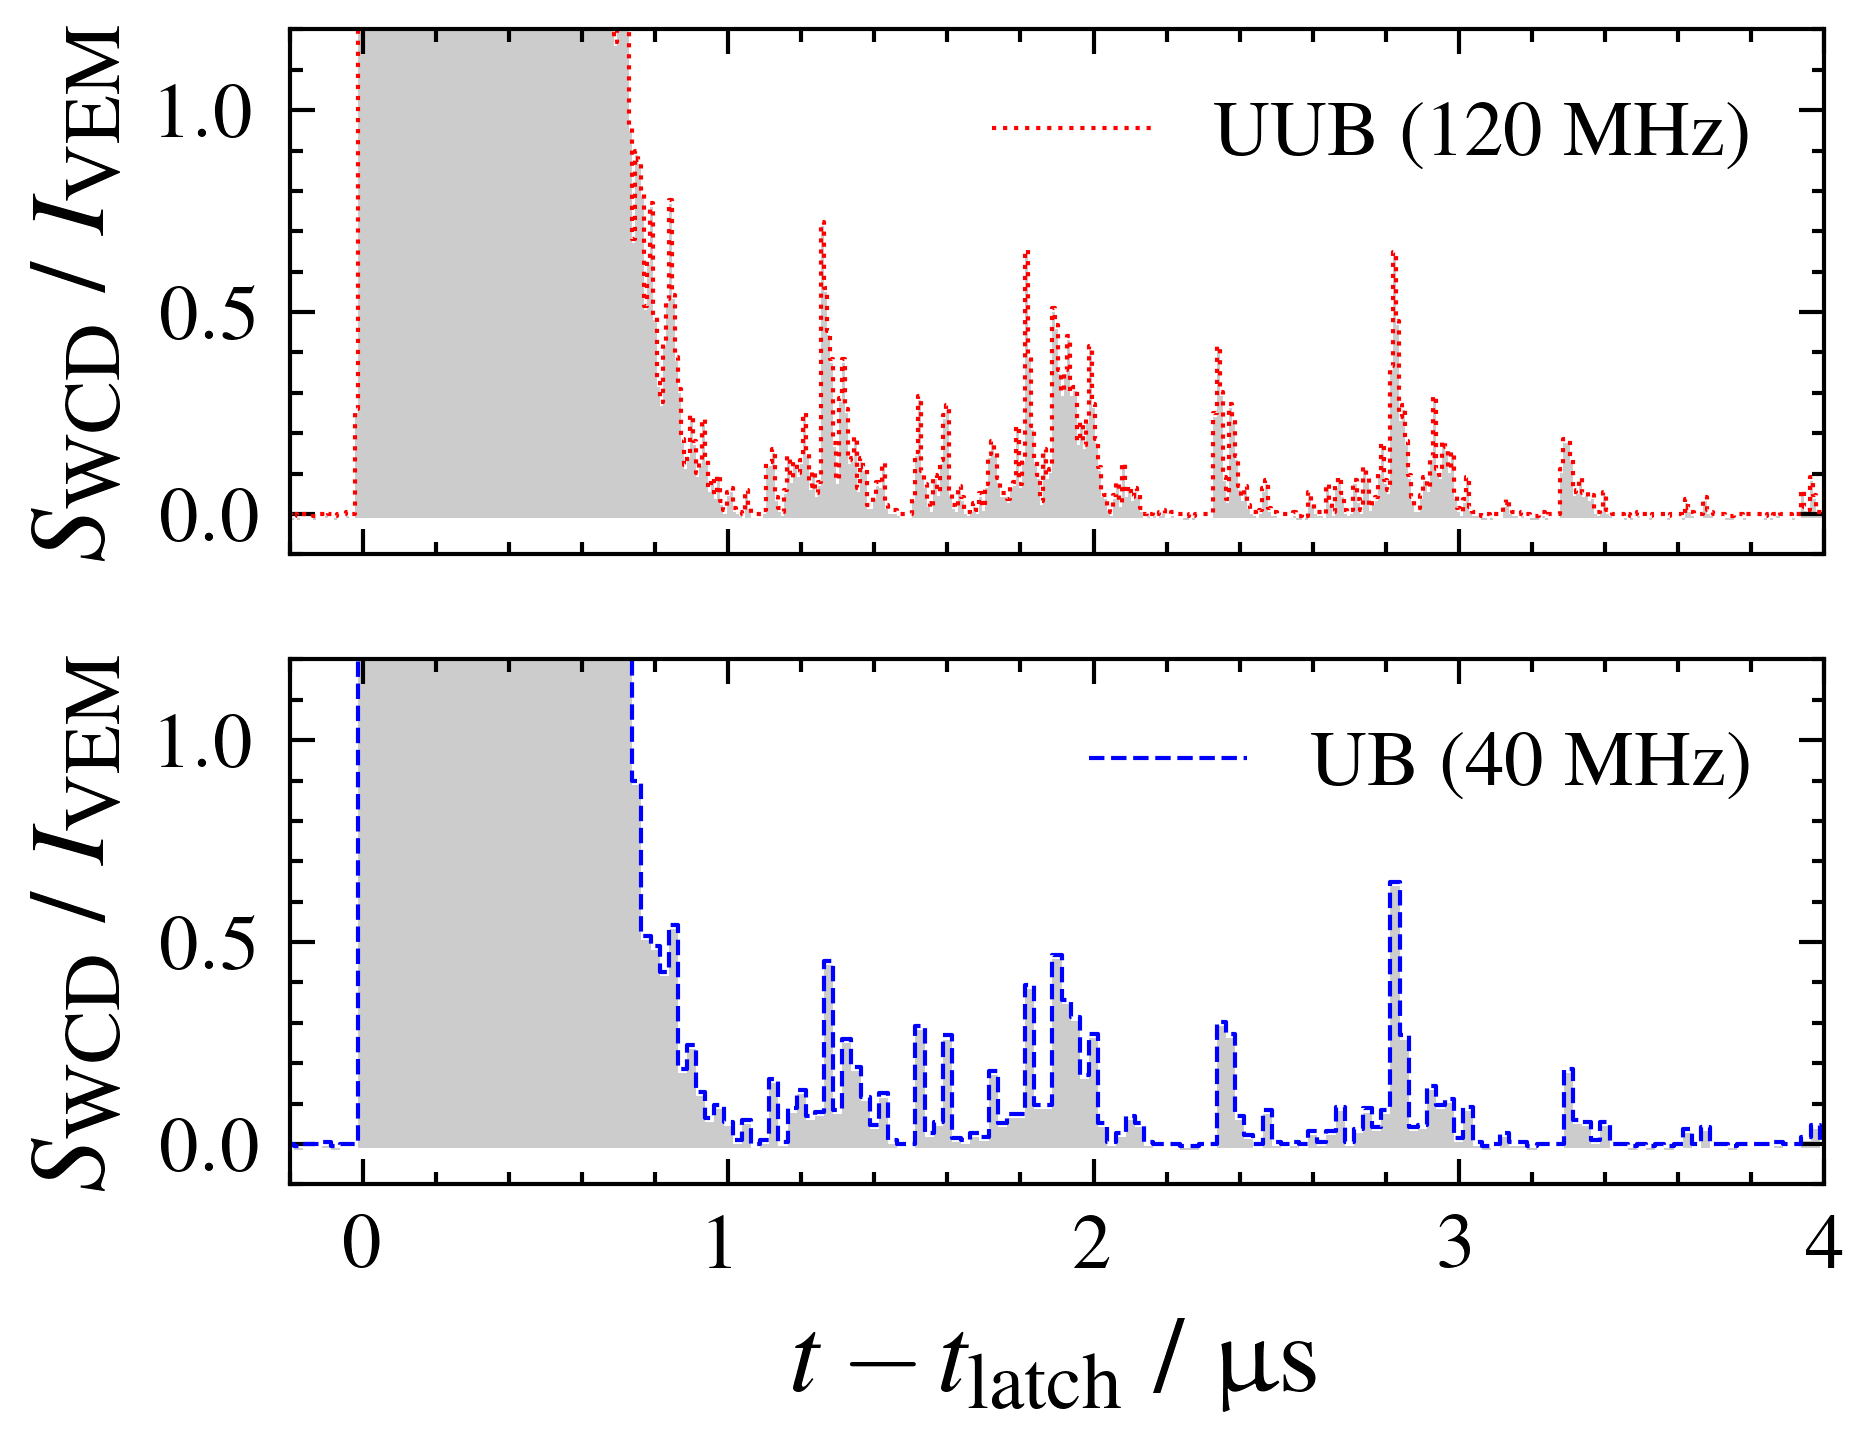

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

set_plt_style("tex double")

def downsample(pmt : np.ndarray, random_phase : int) -> np.ndarray :
        return pmt[random_phase::3]

wcd_full_bandwidth = station.wcd
wcd_downsampled = downsample(wcd_full_bandwidth.T, 0).T



ax1.bar(UUB.binning * TIME.s_to_us, wcd_full_bandwidth[0], width=8.33e-3, alpha=0.2, bottom=-0.01)
ax2.bar(UB.binning * TIME.s_to_us, wcd_downsampled[0], width=25e-3, alpha=0.2, bottom=-0.01)

for ax, signal, time, c, ls, label in zip([ax1, ax2], 
                            [wcd_full_bandwidth[0], wcd_downsampled[0]], 
                            [UUB.binning * TIME.s_to_us, UB.binning * TIME.s_to_us],
                            ["r", "b"],
                            [":", "--"],
                            ["UUB (120 MHz)", "UB (40 MHz)"]):

    t = [time[i//2] for i in range(2 * len(time))]
    half_bin = 0.5 * np.mean(np.diff(time))
    ax.plot(t - half_bin, [signal[(i-1)//2] for i in range(2* len(time))], lw=0.5, ls=ls, c=c, label=label)
    ax.legend()

ax2.set_xlabel(r"$t - t_\mathrm{latch}$ / $\upmu$s")
ax1.set_ylabel(r"$S_\mathrm{WCD}$ / $I_\mathrm{VEM}$")
ax2.set_ylabel(r"$S_\mathrm{WCD}$ / $I_\mathrm{VEM}$")
ax2.set_xlim(-0.2, 4.0)
ax2.set_ylim(-0.1, 1.2)